In [1]:
import sys
import os
import glob
#print(sys.version_info)
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import collections

# Imports for PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
# getting the labelled data and features from tran_feature_selection notebook
%store -r mixed_flows
%store -r features

mixed_flows['is_attack'].replace(False, 'Benign',inplace=True)
mixed_flows['is_attack'].replace(True, 'Malignant',inplace=True)

mixed_flows.tail()

,%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,...,icmpBFTypH_TypL_Code,icmpTmGtw,icmpEchoSuccRatio,icmpPFindex,connSip,connDip,connSipDip,connSipDprt,connF,is_attack
23301,A,36,0x0000000000000004,1.539954e+09,1.540040e+09,86370.728567,1,2,eth:eapol,14:cc:20:51:33:e8,...,0x00000000_0x00000000_0x0000,0x00000000,0,0,0,0,0,0,0.0,Benign
23302,B,36,0x0000000000000005,1.539954e+09,1.540040e+09,86371.256296,1,2,eth:eapol,30:8c:fb:2f:e4:b2,...,0x00000000_0x00000000_0x0000,0x00000000,0,0,0,0,0,0,0.0,Benign
23303,A,14804,0x0000000000000004,1.540040e+09,1.540040e+09,158.049690,1,2,eth:llc,b4:75:0e:ec:e5:a9,...,0x00000000_0x00000000_0x0000,0x00000000,0,0,0,0,0,0,0.0,Benign
23304,A,31,0x0400000000004000,1.539954e+09,1.540040e+09,86379.592900,1,3,eth:ipv4:tcp,d0:52:a8:00:67:5e,...,0x00000000_0x00000000_0x0000,0x00000000,0,0,1,1,2,2,2.0,Benign
23305,B,31,0x0400000000004001,1.539954e+09,1.540040e+09,86379.591605,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0x00000000_0x00000000_0x0000,0x00000000,0,0,1,1,1,1,1.0,Benign


In [13]:
x = mixed_flows.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
np.mean(x),np.std(x)

(2.1295778060849546e-18, 0.9849615493669506)

In [14]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_mixed_flows = pd.DataFrame(x,columns=feat_cols)
normalised_mixed_flows.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66
23301,-1.645776,19.404555,0.0,-1.544797,-0.958589,0.0,-0.435075,4.863281,8.701569,1.259733,...,-1.137736,-0.854675,-0.785308,-0.712959,0.743981,2.815566,1.827383,-0.661853,-0.43411,-0.012196
23302,-1.645776,19.404674,0.0,-1.544797,-0.958589,0.0,-0.435075,4.863281,8.701569,1.543822,...,-1.137736,-0.854675,-0.785308,-0.712959,0.743986,2.826980,1.853552,-0.661853,-0.43411,-0.012196
23303,1.777662,-0.019821,0.0,-1.544797,-0.958589,0.0,-0.435075,-0.019748,-0.032701,-0.018572,...,-1.137736,-0.854675,-0.785308,-0.712959,0.515834,0.195969,0.030914,-0.661853,-0.43411,-0.012196
23304,-1.646936,19.406552,0.0,0.157796,-0.346655,0.0,-0.406306,7.452321,13.366127,1.500354,...,-0.725144,-0.462668,-0.375496,0.417992,0.426599,0.307225,0.628769,-0.649583,-0.43411,-0.012196
23305,-1.646936,19.406552,0.0,0.157796,-0.346655,0.0,-0.406306,7.477441,13.321305,0.262217,...,-0.725144,-0.658671,-0.580402,-0.147483,0.424591,0.817668,0.633702,2.470460,-0.43411,-0.012196


In [15]:
pca_mixed = PCA(n_components=2)
principalComponents_mixed = pca_mixed.fit_transform(x)

principal_mixed_Df = pd.DataFrame(data = principalComponents_mixed
             , columns = ['principal component 1', 'principal component 2'])
principal_mixed_Df.tail()

,principal component 1,principal component 2
23301,-2.885266,6.289670
23302,-2.910977,6.028339
23303,-3.383289,2.137068
23304,3.202389,11.992959
23305,8.946957,21.253343


In [17]:
print('Explained variation per principal component: {}'.format(pca_mixed.explained_variance_ratio_))

Explained variation per principal component: [0.1471653  0.07647722]


<Figure size 432x288 with 0 Axes>

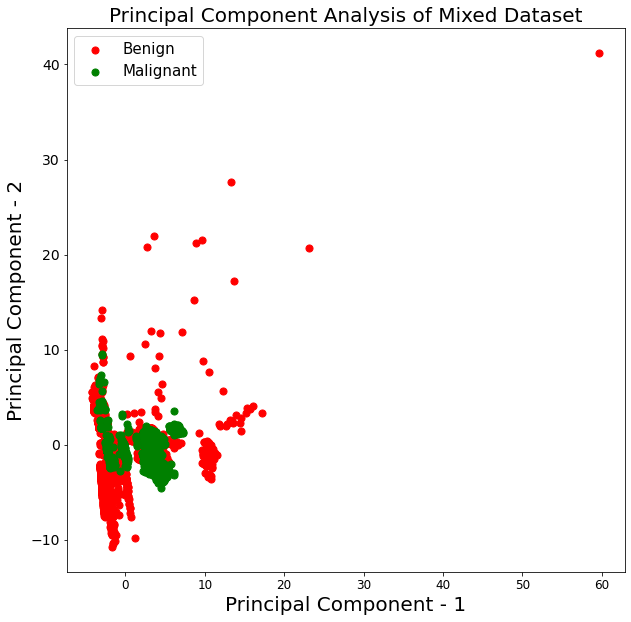

In [18]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Mixed Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = mixed_flows['is_attack'] == target
    plt.scatter(principal_mixed_Df.loc[indicesToKeep, 'principal component 1']
               , principal_mixed_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})